In [1]:
import json
import requests
import pandas
import geopandas

%matplotlib inline

In [3]:
GEO_URLS = dict(
    pcon = ('https://opendata.arcgis.com/datasets/094f326b0b1247e3bcf1eb7236c24679_0.geojson', 'pcon18'),
    la_lower = ('https://opendata.arcgis.com/datasets/2c5b8eb836c7475ba3b305106ac9dfc3_0.geojson', 'lad18'),
    la_upper = ('https://opendata.arcgis.com/datasets/0de4288db3774cb78e45b8b74e9eab31_0.geojson', 'ctyua19'),
    ward = ('https://opendata.arcgis.com/datasets/496e0b4fb23e413aa4feb6bd193bc3d1_0.geojson', 'wd19'),
    lsoa = ('https://opendata.arcgis.com/datasets/da831f80764346889837c72508f046fa_2.geojson', 'lsoa11'),
)

In [4]:
GEO_LOOKUP_URLS = dict(
    ward_pcon_la = 'https://opendata.arcgis.com/datasets/b7435625a4d442bcb331d610f16aacde_0.csv',
    la_lower_to_upper = 'https://opendata.arcgis.com/datasets/3e4f4af826d343349c13fb7f0aa2a307_0.csv',
    oa_lsoa = 'https://opendata.arcgis.com/datasets/6ecda95a83304543bc8feedbd1a58303_0.csv',
    oa_pcon = 'https://opendata.arcgis.com/datasets/45be21e1102e46a181138aa801cc7bae_0.csv',
)

In [5]:
boundaries = {}

for g, u in GEO_URLS.items():
    print(g)
    boundaries[g] = geopandas.read_file(u[0]).rename(columns={
        f'{u[1]}cd': 'code',
        f'{u[1]}nm': 'name_en',
        f'{u[1]}nmw': 'name_cy'
    }).set_index('code')

pcon
la_lower
la_upper
ward
lsoa


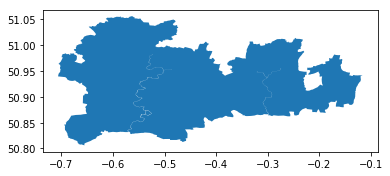

In [6]:
boundaries['pcon'].loc[['E14000534']].plot()

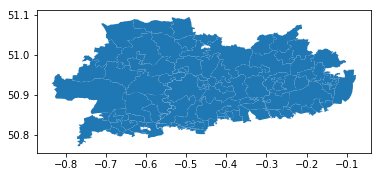

In [7]:
boundaries['lsoa'][boundaries['lsoa'].geometry.intersects(boundaries['pcon'].loc['E14000534'].geometry)].plot()

In [12]:
for area_type in ['pcon', 'la_upper', 'la_lower']:
    for i in boundaries[area_type].index:
        if area_type == 'la_upper' and i in boundaries['la_lower'].index:
            continue
        boundaries[area_type].loc[[i]].to_file(f"data/boundaries/{i}.json", driver="GeoJSON")
        boundaries['lsoa'][
            boundaries['lsoa'].geometry.intersects(boundaries[area_type].loc[i].geometry)
        ].to_file(f"data/boundaries/{i}_lsoa.json", driver="GeoJSON")
        boundaries['ward'][
            boundaries['ward'].geometry.intersects(boundaries[area_type].loc[i].geometry)
        ].to_file(f"data/boundaries/{i}_ward.json", driver="GeoJSON")

('E14000530', name_en    Aldershot
 Name: E14000530, dtype: object)

('E14000531', name_en    Aldridge-Brownhills
 Name: E14000531, dtype: object)

('E14000532', name_en    Altrincham and Sale West
 Name: E14000532, dtype: object)

('E14000533', name_en    Amber Valley
 Name: E14000533, dtype: object)

('E14000534', name_en    Arundel and South Downs
 Name: E14000534, dtype: object)

('E14000535', name_en    Ashfield
 Name: E14000535, dtype: object)

('E14000536', name_en    Ashford
 Name: E14000536, dtype: object)

('E14000537', name_en    Ashton-under-Lyne
 Name: E14000537, dtype: object)

('E14000538', name_en    Aylesbury
 Name: E14000538, dtype: object)

('E14000539', name_en    Banbury
 Name: E14000539, dtype: object)

('E14000540', name_en    Barking
 Name: E14000540, dtype: object)

('E14000541', name_en    Barnsley Central
 Name: E14000541, dtype: object)

('E14000542', name_en    Barnsley East
 Name: E14000542, dtype: object)

('E14000543', name_en    Barrow and Furness
 Name: E14000543, dtype: object)

('E14000544', name_en    Basildon and Billericay
 Name: E14000544, dtype: object)

('E14000545', name_en    Basingstoke
 Name: E14000545, dtype: object)

('E14000546', name_en    Bassetlaw
 Name: E14000546, dtype: object)

('E14000547', name_en    Bath
 Name: E14000547, dtype: object)

('E14000548', name_en    Batley and Spen
 Name: E14000548, dtype: object)

('E14000549', name_en    Battersea
 Name: E14000549, dtype: object)

('E14000550', name_en    Beaconsfield
 Name: E14000550, dtype: object)

('E14000551', name_en    Beckenham
 Name: E14000551, dtype: object)

('E14000552', name_en    Bedford
 Name: E14000552, dtype: object)

('E14000553', name_en    Bermondsey and Old Southwark
 Name: E14000553, dtype: object)

('E14000554', name_en    Berwick-upon-Tweed
 Name: E14000554, dtype: object)

('E14000555', name_en    Bethnal Green and Bow
 Name: E14000555, dtype: object)

('E14000556', name_en    Beverley and Holderness
 Name: E14000556, dtype: object)

('E14000557', name_en    Bexhill and Battle
 Name: E14000557, dtype: object)

('E14000558', name_en    Bexleyheath and Crayford
 Name: E14000558, dtype: object)

('E14000559', name_en    Birkenhead
 Name: E14000559, dtype: object)

('E14000560', name_en    Birmingham, Edgbaston
 Name: E14000560, dtype: object)

('E14000561', name_en    Birmingham, Erdington
 Name: E14000561, dtype: object)

('E14000562', name_en    Birmingham, Hall Green
 Name: E14000562, dtype: object)

('E14000563', name_en    Birmingham, Hodge Hill
 Name: E14000563, dtype: object)

('E14000564', name_en    Birmingham, Ladywood
 Name: E14000564, dtype: object)

('E14000565', name_en    Birmingham, Northfield
 Name: E14000565, dtype: object)

('E14000566', name_en    Birmingham, Perry Barr
 Name: E14000566, dtype: object)

('E14000567', name_en    Birmingham, Selly Oak
 Name: E14000567, dtype: object)

('E14000568', name_en    Birmingham, Yardley
 Name: E14000568, dtype: object)

('E14000569', name_en    Bishop Auckland
 Name: E14000569, dtype: object)

('E14000570', name_en    Blackburn
 Name: E14000570, dtype: object)

('E14000571', name_en    Blackley and Broughton
 Name: E14000571, dtype: object)

('E14000572', name_en    Blackpool North and Cleveleys
 Name: E14000572, dtype: object)

('E14000573', name_en    Blackpool South
 Name: E14000573, dtype: object)

('E14000574', name_en    Blaydon
 Name: E14000574, dtype: object)

('E14000575', name_en    Blyth Valley
 Name: E14000575, dtype: object)

('E14000576', name_en    Bognor Regis and Littlehampton
 Name: E14000576, dtype: object)

('E14000577', name_en    Bolsover
 Name: E14000577, dtype: object)

('E14000578', name_en    Bolton North East
 Name: E14000578, dtype: object)

('E14000579', name_en    Bolton South East
 Name: E14000579, dtype: object)

('E14000580', name_en    Bolton West
 Name: E14000580, dtype: object)

('E14000581', name_en    Bootle
 Name: E14000581, dtype: object)

('E14000582', name_en    Boston and Skegness
 Name: E14000582, dtype: object)

('E14000583', name_en    Bosworth
 Name: E14000583, dtype: object)

('E14000584', name_en    Bournemouth East
 Name: E14000584, dtype: object)

('E14000585', name_en    Bournemouth West
 Name: E14000585, dtype: object)

('E14000586', name_en    Bracknell
 Name: E14000586, dtype: object)

('E14000587', name_en    Bradford East
 Name: E14000587, dtype: object)

('E14000588', name_en    Bradford South
 Name: E14000588, dtype: object)

('E14000589', name_en    Bradford West
 Name: E14000589, dtype: object)

('E14000590', name_en    Braintree
 Name: E14000590, dtype: object)

('E14000591', name_en    Brent Central
 Name: E14000591, dtype: object)

('E14000592', name_en    Brent North
 Name: E14000592, dtype: object)

('E14000593', name_en    Brentford and Isleworth
 Name: E14000593, dtype: object)

('E14000594', name_en    Brentwood and Ongar
 Name: E14000594, dtype: object)

('E14000595', name_en    Bridgwater and West Somerset
 Name: E14000595, dtype: object)

('E14000596', name_en    Brigg and Goole
 Name: E14000596, dtype: object)

('E14000597', name_en    Brighton, Kemptown
 Name: E14000597, dtype: object)

('E14000598', name_en    Brighton, Pavilion
 Name: E14000598, dtype: object)

('E14000599', name_en    Bristol East
 Name: E14000599, dtype: object)

('E14000600', name_en    Bristol North West
 Name: E14000600, dtype: object)

('E14000601', name_en    Bristol South
 Name: E14000601, dtype: object)

('E14000602', name_en    Bristol West
 Name: E14000602, dtype: object)

('E14000603', name_en    Broadland
 Name: E14000603, dtype: object)

('E14000604', name_en    Bromley and Chislehurst
 Name: E14000604, dtype: object)

('E14000605', name_en    Bromsgrove
 Name: E14000605, dtype: object)

('E14000606', name_en    Broxbourne
 Name: E14000606, dtype: object)

('E14000607', name_en    Broxtowe
 Name: E14000607, dtype: object)

('E14000608', name_en    Buckingham
 Name: E14000608, dtype: object)

('E14000609', name_en    Burnley
 Name: E14000609, dtype: object)

('E14000610', name_en    Burton
 Name: E14000610, dtype: object)

('E14000611', name_en    Bury North
 Name: E14000611, dtype: object)

('E14000612', name_en    Bury South
 Name: E14000612, dtype: object)

('E14000613', name_en    Bury St. Edmunds
 Name: E14000613, dtype: object)

('E14000614', name_en    Calder Valley
 Name: E14000614, dtype: object)

('E14000615', name_en    Camberwell and Peckham
 Name: E14000615, dtype: object)

('E14000616', name_en    Camborne and Redruth
 Name: E14000616, dtype: object)

('E14000617', name_en    Cambridge
 Name: E14000617, dtype: object)

('E14000618', name_en    Cannock Chase
 Name: E14000618, dtype: object)

('E14000619', name_en    Canterbury
 Name: E14000619, dtype: object)

('E14000620', name_en    Carlisle
 Name: E14000620, dtype: object)

('E14000621', name_en    Carshalton and Wallington
 Name: E14000621, dtype: object)

('E14000622', name_en    Castle Point
 Name: E14000622, dtype: object)

('E14000623', name_en    Central Devon
 Name: E14000623, dtype: object)

('E14000624', name_en    Central Suffolk and North Ipswich
 Name: E14000624, dtype: object)

('E14000625', name_en    Charnwood
 Name: E14000625, dtype: object)

('E14000626', name_en    Chatham and Aylesford
 Name: E14000626, dtype: object)

('E14000627', name_en    Cheadle
 Name: E14000627, dtype: object)

('E14000628', name_en    Chelmsford
 Name: E14000628, dtype: object)

('E14000629', name_en    Chelsea and Fulham
 Name: E14000629, dtype: object)

('E14000630', name_en    Cheltenham
 Name: E14000630, dtype: object)

('E14000631', name_en    Chesham and Amersham
 Name: E14000631, dtype: object)

('E14000632', name_en    Chesterfield
 Name: E14000632, dtype: object)

('E14000633', name_en    Chichester
 Name: E14000633, dtype: object)

('E14000634', name_en    Chingford and Woodford Green
 Name: E14000634, dtype: object)

('E14000635', name_en    Chippenham
 Name: E14000635, dtype: object)

('E14000636', name_en    Chipping Barnet
 Name: E14000636, dtype: object)

('E14000637', name_en    Chorley
 Name: E14000637, dtype: object)

('E14000638', name_en    Christchurch
 Name: E14000638, dtype: object)

('E14000639', name_en    Cities of London and Westminster
 Name: E14000639, dtype: object)

('E14000640', name_en    City of Chester
 Name: E14000640, dtype: object)

('E14000641', name_en    City of Durham
 Name: E14000641, dtype: object)

('E14000642', name_en    Clacton
 Name: E14000642, dtype: object)

('E14000643', name_en    Cleethorpes
 Name: E14000643, dtype: object)

('E14000644', name_en    Colchester
 Name: E14000644, dtype: object)

('E14000645', name_en    Colne Valley
 Name: E14000645, dtype: object)

('E14000646', name_en    Congleton
 Name: E14000646, dtype: object)

('E14000647', name_en    Copeland
 Name: E14000647, dtype: object)

('E14000648', name_en    Corby
 Name: E14000648, dtype: object)

('E14000649', name_en    Coventry North East
 Name: E14000649, dtype: object)

('E14000650', name_en    Coventry North West
 Name: E14000650, dtype: object)

('E14000651', name_en    Coventry South
 Name: E14000651, dtype: object)

('E14000652', name_en    Crawley
 Name: E14000652, dtype: object)

('E14000653', name_en    Crewe and Nantwich
 Name: E14000653, dtype: object)

('E14000654', name_en    Croydon Central
 Name: E14000654, dtype: object)

('E14000655', name_en    Croydon North
 Name: E14000655, dtype: object)

('E14000656', name_en    Croydon South
 Name: E14000656, dtype: object)

('E14000657', name_en    Dagenham and Rainham
 Name: E14000657, dtype: object)

('E14000658', name_en    Darlington
 Name: E14000658, dtype: object)

('E14000659', name_en    Dartford
 Name: E14000659, dtype: object)

('E14000660', name_en    Daventry
 Name: E14000660, dtype: object)

('E14000661', name_en    Denton and Reddish
 Name: E14000661, dtype: object)

('E14000662', name_en    Derby North
 Name: E14000662, dtype: object)

('E14000663', name_en    Derby South
 Name: E14000663, dtype: object)

('E14000664', name_en    Derbyshire Dales
 Name: E14000664, dtype: object)

('E14000665', name_en    Devizes
 Name: E14000665, dtype: object)

('E14000666', name_en    Dewsbury
 Name: E14000666, dtype: object)

('E14000667', name_en    Don Valley
 Name: E14000667, dtype: object)

('E14000668', name_en    Doncaster Central
 Name: E14000668, dtype: object)

('E14000669', name_en    Doncaster North
 Name: E14000669, dtype: object)

('E14000670', name_en    Dover
 Name: E14000670, dtype: object)

('E14000671', name_en    Dudley North
 Name: E14000671, dtype: object)

('E14000672', name_en    Dudley South
 Name: E14000672, dtype: object)

('E14000673', name_en    Dulwich and West Norwood
 Name: E14000673, dtype: object)

('E14000674', name_en    Ealing Central and Acton
 Name: E14000674, dtype: object)

('E14000675', name_en    Ealing North
 Name: E14000675, dtype: object)

('E14000676', name_en    Ealing, Southall
 Name: E14000676, dtype: object)

('E14000677', name_en    Easington
 Name: E14000677, dtype: object)

('E14000678', name_en    East Devon
 Name: E14000678, dtype: object)

('E14000679', name_en    East Ham
 Name: E14000679, dtype: object)

('E14000680', name_en    East Hampshire
 Name: E14000680, dtype: object)

('E14000681', name_en    East Surrey
 Name: E14000681, dtype: object)

('E14000682', name_en    East Worthing and Shoreham
 Name: E14000682, dtype: object)

('E14000683', name_en    East Yorkshire
 Name: E14000683, dtype: object)

('E14000684', name_en    Eastbourne
 Name: E14000684, dtype: object)

('E14000685', name_en    Eastleigh
 Name: E14000685, dtype: object)

('E14000686', name_en    Eddisbury
 Name: E14000686, dtype: object)

('E14000687', name_en    Edmonton
 Name: E14000687, dtype: object)

('E14000688', name_en    Ellesmere Port and Neston
 Name: E14000688, dtype: object)

('E14000689', name_en    Elmet and Rothwell
 Name: E14000689, dtype: object)

('E14000690', name_en    Eltham
 Name: E14000690, dtype: object)

('E14000691', name_en    Enfield North
 Name: E14000691, dtype: object)

('E14000692', name_en    Enfield, Southgate
 Name: E14000692, dtype: object)

('E14000693', name_en    Epping Forest
 Name: E14000693, dtype: object)

('E14000694', name_en    Epsom and Ewell
 Name: E14000694, dtype: object)

('E14000695', name_en    Erewash
 Name: E14000695, dtype: object)

('E14000696', name_en    Erith and Thamesmead
 Name: E14000696, dtype: object)

('E14000697', name_en    Esher and Walton
 Name: E14000697, dtype: object)

('E14000698', name_en    Exeter
 Name: E14000698, dtype: object)

('E14000699', name_en    Fareham
 Name: E14000699, dtype: object)

('E14000700', name_en    Faversham and Mid Kent
 Name: E14000700, dtype: object)

('E14000701', name_en    Feltham and Heston
 Name: E14000701, dtype: object)

('E14000702', name_en    Filton and Bradley Stoke
 Name: E14000702, dtype: object)

('E14000703', name_en    Finchley and Golders Green
 Name: E14000703, dtype: object)

('E14000704', name_en    Folkestone and Hythe
 Name: E14000704, dtype: object)

('E14000705', name_en    Forest of Dean
 Name: E14000705, dtype: object)

('E14000706', name_en    Fylde
 Name: E14000706, dtype: object)

('E14000707', name_en    Gainsborough
 Name: E14000707, dtype: object)

('E14000708', name_en    Garston and Halewood
 Name: E14000708, dtype: object)

('E14000709', name_en    Gateshead
 Name: E14000709, dtype: object)

('E14000710', name_en    Gedling
 Name: E14000710, dtype: object)

('E14000711', name_en    Gillingham and Rainham
 Name: E14000711, dtype: object)

('E14000712', name_en    Gloucester
 Name: E14000712, dtype: object)

('E14000713', name_en    Gosport
 Name: E14000713, dtype: object)

('E14000714', name_en    Grantham and Stamford
 Name: E14000714, dtype: object)

('E14000715', name_en    Gravesham
 Name: E14000715, dtype: object)

('E14000716', name_en    Great Grimsby
 Name: E14000716, dtype: object)

('E14000717', name_en    Great Yarmouth
 Name: E14000717, dtype: object)

('E14000718', name_en    Greenwich and Woolwich
 Name: E14000718, dtype: object)

('E14000719', name_en    Guildford
 Name: E14000719, dtype: object)

('E14000720', name_en    Hackney North and Stoke Newington
 Name: E14000720, dtype: object)

('E14000721', name_en    Hackney South and Shoreditch
 Name: E14000721, dtype: object)

('E14000722', name_en    Halesowen and Rowley Regis
 Name: E14000722, dtype: object)

('E14000723', name_en    Halifax
 Name: E14000723, dtype: object)

('E14000724', name_en    Haltemprice and Howden
 Name: E14000724, dtype: object)

('E14000725', name_en    Halton
 Name: E14000725, dtype: object)

('E14000726', name_en    Hammersmith
 Name: E14000726, dtype: object)

('E14000727', name_en    Hampstead and Kilburn
 Name: E14000727, dtype: object)

('E14000728', name_en    Harborough
 Name: E14000728, dtype: object)

('E14000729', name_en    Harlow
 Name: E14000729, dtype: object)

('E14000730', name_en    Harrogate and Knaresborough
 Name: E14000730, dtype: object)

('E14000731', name_en    Harrow East
 Name: E14000731, dtype: object)

('E14000732', name_en    Harrow West
 Name: E14000732, dtype: object)

('E14000733', name_en    Hartlepool
 Name: E14000733, dtype: object)

('E14000734', name_en    Harwich and North Essex
 Name: E14000734, dtype: object)

('E14000735', name_en    Hastings and Rye
 Name: E14000735, dtype: object)

('E14000736', name_en    Havant
 Name: E14000736, dtype: object)

('E14000737', name_en    Hayes and Harlington
 Name: E14000737, dtype: object)

('E14000738', name_en    Hazel Grove
 Name: E14000738, dtype: object)

('E14000739', name_en    Hemel Hempstead
 Name: E14000739, dtype: object)

('E14000740', name_en    Hemsworth
 Name: E14000740, dtype: object)

('E14000741', name_en    Hendon
 Name: E14000741, dtype: object)

('E14000742', name_en    Henley
 Name: E14000742, dtype: object)

('E14000743', name_en    Hereford and South Herefordshire
 Name: E14000743, dtype: object)

('E14000744', name_en    Hertford and Stortford
 Name: E14000744, dtype: object)

('E14000745', name_en    Hertsmere
 Name: E14000745, dtype: object)

('E14000746', name_en    Hexham
 Name: E14000746, dtype: object)

('E14000747', name_en    Heywood and Middleton
 Name: E14000747, dtype: object)

('E14000748', name_en    High Peak
 Name: E14000748, dtype: object)

('E14000749', name_en    Hitchin and Harpenden
 Name: E14000749, dtype: object)

('E14000750', name_en    Holborn and St. Pancras
 Name: E14000750, dtype: object)

('E14000751', name_en    Hornchurch and Upminster
 Name: E14000751, dtype: object)

('E14000752', name_en    Hornsey and Wood Green
 Name: E14000752, dtype: object)

('E14000753', name_en    Horsham
 Name: E14000753, dtype: object)

('E14000754', name_en    Houghton and Sunderland South
 Name: E14000754, dtype: object)

('E14000755', name_en    Hove
 Name: E14000755, dtype: object)

('E14000756', name_en    Huddersfield
 Name: E14000756, dtype: object)

('E14000757', name_en    Huntingdon
 Name: E14000757, dtype: object)

('E14000758', name_en    Hyndburn
 Name: E14000758, dtype: object)

('E14000759', name_en    Ilford North
 Name: E14000759, dtype: object)

('E14000760', name_en    Ilford South
 Name: E14000760, dtype: object)

('E14000761', name_en    Ipswich
 Name: E14000761, dtype: object)

('E14000762', name_en    Isle of Wight
 Name: E14000762, dtype: object)

('E14000763', name_en    Islington North
 Name: E14000763, dtype: object)

('E14000764', name_en    Islington South and Finsbury
 Name: E14000764, dtype: object)

('E14000765', name_en    Jarrow
 Name: E14000765, dtype: object)

('E14000766', name_en    Keighley
 Name: E14000766, dtype: object)

('E14000767', name_en    Kenilworth and Southam
 Name: E14000767, dtype: object)

('E14000768', name_en    Kensington
 Name: E14000768, dtype: object)

('E14000769', name_en    Kettering
 Name: E14000769, dtype: object)

('E14000770', name_en    Kingston and Surbiton
 Name: E14000770, dtype: object)

('E14000771', name_en    Kingston upon Hull East
 Name: E14000771, dtype: object)

('E14000772', name_en    Kingston upon Hull North
 Name: E14000772, dtype: object)

('E14000773', name_en    Kingston upon Hull West and Hessle
 Name: E14000773, dtype: object)

('E14000774', name_en    Kingswood
 Name: E14000774, dtype: object)

('E14000775', name_en    Knowsley
 Name: E14000775, dtype: object)

('E14000776', name_en    Lancaster and Fleetwood
 Name: E14000776, dtype: object)

('E14000777', name_en    Leeds Central
 Name: E14000777, dtype: object)

('E14000778', name_en    Leeds East
 Name: E14000778, dtype: object)

('E14000779', name_en    Leeds North East
 Name: E14000779, dtype: object)

('E14000780', name_en    Leeds North West
 Name: E14000780, dtype: object)

('E14000781', name_en    Leeds West
 Name: E14000781, dtype: object)

('E14000782', name_en    Leicester East
 Name: E14000782, dtype: object)

('E14000783', name_en    Leicester South
 Name: E14000783, dtype: object)

('E14000784', name_en    Leicester West
 Name: E14000784, dtype: object)

('E14000785', name_en    Leigh
 Name: E14000785, dtype: object)

('E14000786', name_en    Lewes
 Name: E14000786, dtype: object)

('E14000787', name_en    Lewisham East
 Name: E14000787, dtype: object)

('E14000788', name_en    Lewisham West and Penge
 Name: E14000788, dtype: object)

('E14000789', name_en    Lewisham, Deptford
 Name: E14000789, dtype: object)

('E14000790', name_en    Leyton and Wanstead
 Name: E14000790, dtype: object)

('E14000791', name_en    Lichfield
 Name: E14000791, dtype: object)

('E14000792', name_en    Lincoln
 Name: E14000792, dtype: object)

('E14000793', name_en    Liverpool, Riverside
 Name: E14000793, dtype: object)

('E14000794', name_en    Liverpool, Walton
 Name: E14000794, dtype: object)

('E14000795', name_en    Liverpool, Wavertree
 Name: E14000795, dtype: object)

('E14000796', name_en    Liverpool, West Derby
 Name: E14000796, dtype: object)

('E14000797', name_en    Loughborough
 Name: E14000797, dtype: object)

('E14000798', name_en    Louth and Horncastle
 Name: E14000798, dtype: object)

('E14000799', name_en    Ludlow
 Name: E14000799, dtype: object)

('E14000800', name_en    Luton North
 Name: E14000800, dtype: object)

('E14000801', name_en    Luton South
 Name: E14000801, dtype: object)

('E14000802', name_en    Macclesfield
 Name: E14000802, dtype: object)

('E14000803', name_en    Maidenhead
 Name: E14000803, dtype: object)

('E14000804', name_en    Maidstone and The Weald
 Name: E14000804, dtype: object)

('E14000805', name_en    Makerfield
 Name: E14000805, dtype: object)

('E14000806', name_en    Maldon
 Name: E14000806, dtype: object)

('E14000807', name_en    Manchester Central
 Name: E14000807, dtype: object)

('E14000808', name_en    Manchester, Gorton
 Name: E14000808, dtype: object)

('E14000809', name_en    Manchester, Withington
 Name: E14000809, dtype: object)

('E14000810', name_en    Mansfield
 Name: E14000810, dtype: object)

('E14000811', name_en    Meon Valley
 Name: E14000811, dtype: object)

('E14000812', name_en    Meriden
 Name: E14000812, dtype: object)

('E14000813', name_en    Mid Bedfordshire
 Name: E14000813, dtype: object)

('E14000814', name_en    Mid Derbyshire
 Name: E14000814, dtype: object)

('E14000815', name_en    Mid Dorset and North Poole
 Name: E14000815, dtype: object)

('E14000816', name_en    Mid Norfolk
 Name: E14000816, dtype: object)

('E14000817', name_en    Mid Sussex
 Name: E14000817, dtype: object)

('E14000818', name_en    Mid Worcestershire
 Name: E14000818, dtype: object)

('E14000819', name_en    Middlesbrough
 Name: E14000819, dtype: object)

('E14000820', name_en    Middlesbrough South and East Cleveland
 Name: E14000820, dtype: object)

('E14000821', name_en    Milton Keynes North
 Name: E14000821, dtype: object)

('E14000822', name_en    Milton Keynes South
 Name: E14000822, dtype: object)

('E14000823', name_en    Mitcham and Morden
 Name: E14000823, dtype: object)

('E14000824', name_en    Mole Valley
 Name: E14000824, dtype: object)

('E14000825', name_en    Morecambe and Lunesdale
 Name: E14000825, dtype: object)

('E14000826', name_en    Morley and Outwood
 Name: E14000826, dtype: object)

('E14000827', name_en    New Forest East
 Name: E14000827, dtype: object)

('E14000828', name_en    New Forest West
 Name: E14000828, dtype: object)

('E14000829', name_en    Newark
 Name: E14000829, dtype: object)

('E14000830', name_en    Newbury
 Name: E14000830, dtype: object)

('E14000831', name_en    Newcastle upon Tyne Central
 Name: E14000831, dtype: object)

('E14000832', name_en    Newcastle upon Tyne East
 Name: E14000832, dtype: object)

('E14000833', name_en    Newcastle upon Tyne North
 Name: E14000833, dtype: object)

('E14000834', name_en    Newcastle-under-Lyme
 Name: E14000834, dtype: object)

('E14000835', name_en    Newton Abbot
 Name: E14000835, dtype: object)

('E14000836', name_en    Normanton, Pontefract and Castleford
 Name: E14000836, dtype: object)

('E14000837', name_en    North Cornwall
 Name: E14000837, dtype: object)

('E14000838', name_en    North Devon
 Name: E14000838, dtype: object)

('E14000839', name_en    North Dorset
 Name: E14000839, dtype: object)

('E14000840', name_en    North Durham
 Name: E14000840, dtype: object)

('E14000841', name_en    North East Bedfordshire
 Name: E14000841, dtype: object)

('E14000842', name_en    North East Cambridgeshire
 Name: E14000842, dtype: object)

('E14000843', name_en    North East Derbyshire
 Name: E14000843, dtype: object)

('E14000844', name_en    North East Hampshire
 Name: E14000844, dtype: object)

('E14000845', name_en    North East Hertfordshire
 Name: E14000845, dtype: object)

('E14000846', name_en    North East Somerset
 Name: E14000846, dtype: object)

('E14000847', name_en    North Herefordshire
 Name: E14000847, dtype: object)

('E14000848', name_en    North Norfolk
 Name: E14000848, dtype: object)

('E14000849', name_en    North Shropshire
 Name: E14000849, dtype: object)

('E14000850', name_en    North Somerset
 Name: E14000850, dtype: object)

('E14000851', name_en    North Swindon
 Name: E14000851, dtype: object)

('E14000852', name_en    North Thanet
 Name: E14000852, dtype: object)

('E14000853', name_en    North Tyneside
 Name: E14000853, dtype: object)

('E14000854', name_en    North Warwickshire
 Name: E14000854, dtype: object)

('E14000855', name_en    North West Cambridgeshire
 Name: E14000855, dtype: object)

('E14000856', name_en    North West Durham
 Name: E14000856, dtype: object)

('E14000857', name_en    North West Hampshire
 Name: E14000857, dtype: object)

('E14000858', name_en    North West Leicestershire
 Name: E14000858, dtype: object)

('E14000859', name_en    North West Norfolk
 Name: E14000859, dtype: object)

('E14000860', name_en    North Wiltshire
 Name: E14000860, dtype: object)

('E14000861', name_en    Northampton North
 Name: E14000861, dtype: object)

('E14000862', name_en    Northampton South
 Name: E14000862, dtype: object)

('E14000863', name_en    Norwich North
 Name: E14000863, dtype: object)

('E14000864', name_en    Norwich South
 Name: E14000864, dtype: object)

('E14000865', name_en    Nottingham East
 Name: E14000865, dtype: object)

('E14000866', name_en    Nottingham North
 Name: E14000866, dtype: object)

('E14000867', name_en    Nottingham South
 Name: E14000867, dtype: object)

('E14000868', name_en    Nuneaton
 Name: E14000868, dtype: object)

('E14000869', name_en    Old Bexley and Sidcup
 Name: E14000869, dtype: object)

('E14000870', name_en    Oldham East and Saddleworth
 Name: E14000870, dtype: object)

('E14000871', name_en    Oldham West and Royton
 Name: E14000871, dtype: object)

('E14000872', name_en    Orpington
 Name: E14000872, dtype: object)

('E14000873', name_en    Oxford East
 Name: E14000873, dtype: object)

('E14000874', name_en    Oxford West and Abingdon
 Name: E14000874, dtype: object)

('E14000875', name_en    Pendle
 Name: E14000875, dtype: object)

('E14000876', name_en    Penistone and Stocksbridge
 Name: E14000876, dtype: object)

('E14000877', name_en    Penrith and The Border
 Name: E14000877, dtype: object)

('E14000878', name_en    Peterborough
 Name: E14000878, dtype: object)

('E14000879', name_en    Plymouth, Moor View
 Name: E14000879, dtype: object)

('E14000880', name_en    Plymouth, Sutton and Devonport
 Name: E14000880, dtype: object)

('E14000881', name_en    Poole
 Name: E14000881, dtype: object)

('E14000882', name_en    Poplar and Limehouse
 Name: E14000882, dtype: object)

('E14000883', name_en    Portsmouth North
 Name: E14000883, dtype: object)

('E14000884', name_en    Portsmouth South
 Name: E14000884, dtype: object)

('E14000885', name_en    Preston
 Name: E14000885, dtype: object)

('E14000886', name_en    Pudsey
 Name: E14000886, dtype: object)

('E14000887', name_en    Putney
 Name: E14000887, dtype: object)

('E14000888', name_en    Rayleigh and Wickford
 Name: E14000888, dtype: object)

('E14000889', name_en    Reading East
 Name: E14000889, dtype: object)

('E14000890', name_en    Reading West
 Name: E14000890, dtype: object)

('E14000891', name_en    Redcar
 Name: E14000891, dtype: object)

('E14000892', name_en    Redditch
 Name: E14000892, dtype: object)

('E14000893', name_en    Reigate
 Name: E14000893, dtype: object)

('E14000894', name_en    Ribble Valley
 Name: E14000894, dtype: object)

('E14000895', name_en    Richmond (Yorks)
 Name: E14000895, dtype: object)

('E14000896', name_en    Richmond Park
 Name: E14000896, dtype: object)

('E14000897', name_en    Rochdale
 Name: E14000897, dtype: object)

('E14000898', name_en    Rochester and Strood
 Name: E14000898, dtype: object)

('E14000899', name_en    Rochford and Southend East
 Name: E14000899, dtype: object)

('E14000900', name_en    Romford
 Name: E14000900, dtype: object)

('E14000901', name_en    Romsey and Southampton North
 Name: E14000901, dtype: object)

('E14000902', name_en    Rossendale and Darwen
 Name: E14000902, dtype: object)

('E14000903', name_en    Rother Valley
 Name: E14000903, dtype: object)

('E14000904', name_en    Rotherham
 Name: E14000904, dtype: object)

('E14000905', name_en    Rugby
 Name: E14000905, dtype: object)

('E14000906', name_en    Ruislip, Northwood and Pinner
 Name: E14000906, dtype: object)

('E14000907', name_en    Runnymede and Weybridge
 Name: E14000907, dtype: object)

('E14000908', name_en    Rushcliffe
 Name: E14000908, dtype: object)

('E14000909', name_en    Rutland and Melton
 Name: E14000909, dtype: object)

('E14000910', name_en    Saffron Walden
 Name: E14000910, dtype: object)

('E14000911', name_en    Salford and Eccles
 Name: E14000911, dtype: object)

('E14000912', name_en    Salisbury
 Name: E14000912, dtype: object)

('E14000913', name_en    Scarborough and Whitby
 Name: E14000913, dtype: object)

('E14000914', name_en    Scunthorpe
 Name: E14000914, dtype: object)

('E14000915', name_en    Sedgefield
 Name: E14000915, dtype: object)

('E14000916', name_en    Sefton Central
 Name: E14000916, dtype: object)

('E14000917', name_en    Selby and Ainsty
 Name: E14000917, dtype: object)

('E14000918', name_en    Sevenoaks
 Name: E14000918, dtype: object)

('E14000919', name_en    Sheffield Central
 Name: E14000919, dtype: object)

('E14000920', name_en    Sheffield South East
 Name: E14000920, dtype: object)

('E14000921', name_en    Sheffield, Brightside and Hillsborough
 Name: E14000921, dtype: object)

('E14000922', name_en    Sheffield, Hallam
 Name: E14000922, dtype: object)

('E14000923', name_en    Sheffield, Heeley
 Name: E14000923, dtype: object)

('E14000924', name_en    Sherwood
 Name: E14000924, dtype: object)

('E14000925', name_en    Shipley
 Name: E14000925, dtype: object)

('E14000926', name_en    Shrewsbury and Atcham
 Name: E14000926, dtype: object)

('E14000927', name_en    Sittingbourne and Sheppey
 Name: E14000927, dtype: object)

('E14000928', name_en    Skipton and Ripon
 Name: E14000928, dtype: object)

('E14000929', name_en    Sleaford and North Hykeham
 Name: E14000929, dtype: object)

('E14000930', name_en    Slough
 Name: E14000930, dtype: object)

('E14000931', name_en    Solihull
 Name: E14000931, dtype: object)

('E14000932', name_en    Somerton and Frome
 Name: E14000932, dtype: object)

('E14000933', name_en    South Basildon and East Thurrock
 Name: E14000933, dtype: object)

('E14000934', name_en    South Cambridgeshire
 Name: E14000934, dtype: object)

('E14000935', name_en    South Derbyshire
 Name: E14000935, dtype: object)

('E14000936', name_en    South Dorset
 Name: E14000936, dtype: object)

('E14000937', name_en    South East Cambridgeshire
 Name: E14000937, dtype: object)

('E14000938', name_en    South East Cornwall
 Name: E14000938, dtype: object)

('E14000939', name_en    South Holland and The Deepings
 Name: E14000939, dtype: object)

('E14000940', name_en    South Leicestershire
 Name: E14000940, dtype: object)

('E14000941', name_en    South Norfolk
 Name: E14000941, dtype: object)

('E14000942', name_en    South Northamptonshire
 Name: E14000942, dtype: object)

('E14000943', name_en    South Ribble
 Name: E14000943, dtype: object)

('E14000944', name_en    South Shields
 Name: E14000944, dtype: object)

('E14000945', name_en    South Staffordshire
 Name: E14000945, dtype: object)

('E14000946', name_en    South Suffolk
 Name: E14000946, dtype: object)

('E14000947', name_en    South Swindon
 Name: E14000947, dtype: object)

('E14000948', name_en    South Thanet
 Name: E14000948, dtype: object)

('E14000949', name_en    South West Bedfordshire
 Name: E14000949, dtype: object)

('E14000950', name_en    South West Devon
 Name: E14000950, dtype: object)

('E14000951', name_en    South West Hertfordshire
 Name: E14000951, dtype: object)

('E14000952', name_en    South West Norfolk
 Name: E14000952, dtype: object)

('E14000953', name_en    South West Surrey
 Name: E14000953, dtype: object)

('E14000954', name_en    South West Wiltshire
 Name: E14000954, dtype: object)

('E14000955', name_en    Southampton, Itchen
 Name: E14000955, dtype: object)

('E14000956', name_en    Southampton, Test
 Name: E14000956, dtype: object)

('E14000957', name_en    Southend West
 Name: E14000957, dtype: object)

('E14000958', name_en    Southport
 Name: E14000958, dtype: object)

('E14000959', name_en    Spelthorne
 Name: E14000959, dtype: object)

('E14000960', name_en    St. Albans
 Name: E14000960, dtype: object)

('E14000961', name_en    St. Austell and Newquay
 Name: E14000961, dtype: object)

('E14000962', name_en    St. Helens North
 Name: E14000962, dtype: object)

('E14000963', name_en    St. Helens South and Whiston
 Name: E14000963, dtype: object)

('E14000964', name_en    St. Ives
 Name: E14000964, dtype: object)

('E14000965', name_en    Stafford
 Name: E14000965, dtype: object)

('E14000966', name_en    Staffordshire Moorlands
 Name: E14000966, dtype: object)

('E14000967', name_en    Stalybridge and Hyde
 Name: E14000967, dtype: object)

('E14000968', name_en    Stevenage
 Name: E14000968, dtype: object)

('E14000969', name_en    Stockport
 Name: E14000969, dtype: object)

('E14000970', name_en    Stockton North
 Name: E14000970, dtype: object)

('E14000971', name_en    Stockton South
 Name: E14000971, dtype: object)

('E14000972', name_en    Stoke-on-Trent Central
 Name: E14000972, dtype: object)

('E14000973', name_en    Stoke-on-Trent North
 Name: E14000973, dtype: object)

('E14000974', name_en    Stoke-on-Trent South
 Name: E14000974, dtype: object)

('E14000975', name_en    Stone
 Name: E14000975, dtype: object)

('E14000976', name_en    Stourbridge
 Name: E14000976, dtype: object)

('E14000977', name_en    Stratford-on-Avon
 Name: E14000977, dtype: object)

('E14000978', name_en    Streatham
 Name: E14000978, dtype: object)

('E14000979', name_en    Stretford and Urmston
 Name: E14000979, dtype: object)

('E14000980', name_en    Stroud
 Name: E14000980, dtype: object)

('E14000981', name_en    Suffolk Coastal
 Name: E14000981, dtype: object)

('E14000982', name_en    Sunderland Central
 Name: E14000982, dtype: object)

('E14000983', name_en    Surrey Heath
 Name: E14000983, dtype: object)

('E14000984', name_en    Sutton and Cheam
 Name: E14000984, dtype: object)

('E14000985', name_en    Sutton Coldfield
 Name: E14000985, dtype: object)

('E14000986', name_en    Tamworth
 Name: E14000986, dtype: object)

('E14000987', name_en    Tatton
 Name: E14000987, dtype: object)

('E14000988', name_en    Taunton Deane
 Name: E14000988, dtype: object)

('E14000989', name_en    Telford
 Name: E14000989, dtype: object)

('E14000990', name_en    Tewkesbury
 Name: E14000990, dtype: object)

('E14000991', name_en    The Cotswolds
 Name: E14000991, dtype: object)

('E14000992', name_en    The Wrekin
 Name: E14000992, dtype: object)

('E14000993', name_en    Thirsk and Malton
 Name: E14000993, dtype: object)

('E14000994', name_en    Thornbury and Yate
 Name: E14000994, dtype: object)

('E14000995', name_en    Thurrock
 Name: E14000995, dtype: object)

('E14000996', name_en    Tiverton and Honiton
 Name: E14000996, dtype: object)

('E14000997', name_en    Tonbridge and Malling
 Name: E14000997, dtype: object)

('E14000998', name_en    Tooting
 Name: E14000998, dtype: object)

('E14000999', name_en    Torbay
 Name: E14000999, dtype: object)

('E14001000', name_en    Torridge and West Devon
 Name: E14001000, dtype: object)

('E14001001', name_en    Totnes
 Name: E14001001, dtype: object)

('E14001002', name_en    Tottenham
 Name: E14001002, dtype: object)

('E14001003', name_en    Truro and Falmouth
 Name: E14001003, dtype: object)

('E14001004', name_en    Tunbridge Wells
 Name: E14001004, dtype: object)

('E14001005', name_en    Twickenham
 Name: E14001005, dtype: object)

('E14001006', name_en    Tynemouth
 Name: E14001006, dtype: object)

('E14001007', name_en    Uxbridge and South Ruislip
 Name: E14001007, dtype: object)

('E14001008', name_en    Vauxhall
 Name: E14001008, dtype: object)

('E14001009', name_en    Wakefield
 Name: E14001009, dtype: object)

('E14001010', name_en    Wallasey
 Name: E14001010, dtype: object)

('E14001011', name_en    Walsall North
 Name: E14001011, dtype: object)

('E14001012', name_en    Walsall South
 Name: E14001012, dtype: object)

('E14001013', name_en    Walthamstow
 Name: E14001013, dtype: object)

('E14001014', name_en    Wansbeck
 Name: E14001014, dtype: object)

('E14001015', name_en    Wantage
 Name: E14001015, dtype: object)

('E14001016', name_en    Warley
 Name: E14001016, dtype: object)

('E14001017', name_en    Warrington North
 Name: E14001017, dtype: object)

('E14001018', name_en    Warrington South
 Name: E14001018, dtype: object)

('E14001019', name_en    Warwick and Leamington
 Name: E14001019, dtype: object)

('E14001020', name_en    Washington and Sunderland West
 Name: E14001020, dtype: object)

('E14001021', name_en    Watford
 Name: E14001021, dtype: object)

('E14001022', name_en    Waveney
 Name: E14001022, dtype: object)

('E14001023', name_en    Wealden
 Name: E14001023, dtype: object)

('E14001024', name_en    Weaver Vale
 Name: E14001024, dtype: object)

('E14001025', name_en    Wellingborough
 Name: E14001025, dtype: object)

('E14001026', name_en    Wells
 Name: E14001026, dtype: object)

('E14001027', name_en    Welwyn Hatfield
 Name: E14001027, dtype: object)

('E14001028', name_en    Wentworth and Dearne
 Name: E14001028, dtype: object)

('E14001029', name_en    West Bromwich East
 Name: E14001029, dtype: object)

('E14001030', name_en    West Bromwich West
 Name: E14001030, dtype: object)

('E14001031', name_en    West Dorset
 Name: E14001031, dtype: object)

('E14001032', name_en    West Ham
 Name: E14001032, dtype: object)

('E14001033', name_en    West Lancashire
 Name: E14001033, dtype: object)

('E14001034', name_en    West Suffolk
 Name: E14001034, dtype: object)

('E14001035', name_en    West Worcestershire
 Name: E14001035, dtype: object)

('E14001036', name_en    Westminster North
 Name: E14001036, dtype: object)

('E14001037', name_en    Westmorland and Lonsdale
 Name: E14001037, dtype: object)

('E14001038', name_en    Weston-Super-Mare
 Name: E14001038, dtype: object)

('E14001039', name_en    Wigan
 Name: E14001039, dtype: object)

('E14001040', name_en    Wimbledon
 Name: E14001040, dtype: object)

('E14001041', name_en    Winchester
 Name: E14001041, dtype: object)

('E14001042', name_en    Windsor
 Name: E14001042, dtype: object)

('E14001043', name_en    Wirral South
 Name: E14001043, dtype: object)

('E14001044', name_en    Wirral West
 Name: E14001044, dtype: object)

('E14001045', name_en    Witham
 Name: E14001045, dtype: object)

('E14001046', name_en    Witney
 Name: E14001046, dtype: object)

('E14001047', name_en    Woking
 Name: E14001047, dtype: object)

('E14001048', name_en    Wokingham
 Name: E14001048, dtype: object)

('E14001049', name_en    Wolverhampton North East
 Name: E14001049, dtype: object)

('E14001050', name_en    Wolverhampton South East
 Name: E14001050, dtype: object)

('E14001051', name_en    Wolverhampton South West
 Name: E14001051, dtype: object)

('E14001052', name_en    Worcester
 Name: E14001052, dtype: object)

('E14001053', name_en    Workington
 Name: E14001053, dtype: object)

('E14001054', name_en    Worsley and Eccles South
 Name: E14001054, dtype: object)

('E14001055', name_en    Worthing West
 Name: E14001055, dtype: object)

('E14001056', name_en    Wycombe
 Name: E14001056, dtype: object)

('E14001057', name_en    Wyre and Preston North
 Name: E14001057, dtype: object)

('E14001058', name_en    Wyre Forest
 Name: E14001058, dtype: object)

('E14001059', name_en    Wythenshawe and Sale East
 Name: E14001059, dtype: object)

('E14001060', name_en    Yeovil
 Name: E14001060, dtype: object)

('E14001061', name_en    York Central
 Name: E14001061, dtype: object)

('E14001062', name_en    York Outer
 Name: E14001062, dtype: object)

('N06000001', name_en    Belfast East
 Name: N06000001, dtype: object)

ValueError: Cannot write empty DataFrame to file.

In [12]:
lookups = {}
for g, u in GEO_LOOKUP_URLS.items():
    print(g)
    lookups[g] = pandas.read_csv(u)

ward_pcon_la
la_lower_to_upper
oa_lsoa


c:\users\drkan\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


oa_pcon


c:\users\drkan\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
lookups['oa_lsoa_la_pcon'] = lookups['oa_lsoa'].set_index('OA11CD').join(
    lookups['oa_pcon'].set_index('OA11CD')[['PCON11CD', 'PCON11NM', 'PCON11NMW', 'OA11PERCENT']],
).join(
    lookups['la_lower_to_upper'].set_index('LTLA19CD')[['UTLA19CD', 'UTLA19NM']],
    on='LAD11CD'
)

In [27]:
lookups['oa_lsoa_la_pcon']

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,LAD11NMW,ObjectId,PCON11CD,PCON11NM,PCON11NMW,OA11PERCENT,UTLA19CD,UTLA19NM
OA11CD,,,,,,,,,,,,,,
E00000846,E01000170,Barnet 006A,E02000029,Barnet 006,E09000003,Barnet,NaN,1001,E14000636,Chipping Barnet,NaN,100,E09000003,Barnet
E00001181,E01000240,Barnet 031B,E02000054,Barnet 031,E09000003,Barnet,NaN,1002,E14000741,Hendon,NaN,100,E09000003,Barnet
E00000980,E01000203,Barnet 028E,E02000051,Barnet 028,E09000003,Barnet,NaN,1003,E14000703,Finchley and Golders Green,NaN,100,E09000003,Barnet
E00000935,E01000191,Barnet 014F,E02000037,Barnet 014,E09000003,Barnet,NaN,1004,E14000741,Hendon,NaN,100,E09000003,Barnet
E00001048,E01000211,Barnet 035C,E02000058,Barnet 035,E09000003,Barnet,NaN,1005,E14000703,Finchley and Golders Green,NaN,100,E09000003,Barnet
E00000847,E01000172,Barnet 003D,E02000026,Barnet 003,E09000003,Barnet,NaN,1006,E14000636,Chipping Barnet,NaN,100,E09000003,Barnet
E00001182,E01000241,Barnet 031C,E02000054,Barnet 031,E09000003,Barnet,NaN,1007,E14000741,Hendon,NaN,100,E09000003,Barnet
E00000981,E01000201,Barnet 028C,E02000051,Barnet 028,E09000003,Barnet,NaN,1008,E14000703,Finchley and Golders Green,NaN,100,E09000003,Barnet
E00000936,E01000186,Barnet 014A,E02000037,Barnet 014,E09000003,Barnet,NaN,1009,E14000741,Hendon,NaN,100,E09000003,Barnet


In [39]:
area_codes = {
    "LSOA11CD": "lsoa",
    "LAD11CD": "la_lower",
    "UTLA19CD": "la_upper",
    "PCON11CD": "pcon",
}
lsoa_lookups = {
    v: lookups['oa_lsoa_la_pcon'].groupby(['LSOA11CD', c]).size().reset_index().drop(columns=0).rename(columns=area_codes)
    for c, v in area_codes.items() if v != 'lsoa'
}

In [55]:
lookups['ward_pcon_la'] = lookups['ward_pcon_la'].drop(columns=['UTLA19CD', 'UTLA19NM'], errors='ignore').join(
    lookups['la_lower_to_upper'].set_index('LTLA19CD')[['UTLA19CD', 'UTLA19NM']],
    on='LAD18CD'
)

In [56]:
lookups['ward_pcon_la'].columns

Index(['WD18CD', 'WD18NM', 'PCON18CD', 'PCON18NM', 'LAD18CD', 'LAD18NM', 'FID',
       'UTLA19CD', 'UTLA19NM'],
      dtype='object')

In [58]:
area_codes = {
    "WD18CD": "ward",
    "LAD18CD": "la_lower",
    "UTLA19CD": "la_upper",
    "PCON18CD": "pcon",
}
ward_lookups = {
    v: lookups['ward_pcon_la'].groupby(["WD18CD", c]).size().reset_index().drop(columns=0).rename(columns=area_codes)
    for c, v in area_codes.items() if v != 'ward'
}

In [59]:
ward_lookups

{'la_lower':            ward   la_lower
 0     E05000026  E09000002
 1     E05000027  E09000002
 2     E05000028  E09000002
 3     E05000029  E09000002
 4     E05000030  E09000002
 5     E05000031  E09000002
 6     E05000032  E09000002
 7     E05000033  E09000002
 8     E05000034  E09000002
 9     E05000035  E09000002
 10    E05000036  E09000002
 11    E05000037  E09000002
 12    E05000038  E09000002
 13    E05000039  E09000002
 14    E05000040  E09000002
 15    E05000041  E09000002
 16    E05000042  E09000002
 17    E05000043  E09000003
 18    E05000044  E09000003
 19    E05000045  E09000003
 20    E05000046  E09000003
 21    E05000047  E09000003
 22    E05000048  E09000003
 23    E05000049  E09000003
 24    E05000050  E09000003
 25    E05000051  E09000003
 26    E05000052  E09000003
 27    E05000053  E09000003
 28    E05000054  E09000003
 29    E05000055  E09000003
 ...         ...        ...
 9084  W05001009  W06000005
 9085  W05001010  W06000005
 9086  W05001011  W06000015
 9087  W

In [60]:
boundaries['la_lower'].keys()

dict_keys(['status', 'error', 'generating'])

In [67]:
def get_code_field(p):
    for k in p.keys():
        if k.endswith('cd'):
            return k
    
get_code_field(boundaries['la_upper']['features'][0]['properties'])

'ctyua19cd'

In [82]:
area_type = 'la_upper'
features = boundaries[area_type]['features']
code_field = get_code_field(features[0]['properties'])
for f in features[0:10]:
    ward_lookups[area_type][
        ward_lookups[area_type][area_type]==f['properties'][code_field]
    ].ward.unique().tolist()
    lsoa_lookups[area_type][
        lsoa_lookups[area_type][area_type]==f['properties'][code_field]
    ].lsoa.unique().tolist()

['E05008942',
 'E05008943',
 'E05008944',
 'E05008945',
 'E05008946',
 'E05008947',
 'E05008948',
 'E05008949',
 'E05008950',
 'E05008951',
 'E05008952']

['E01011949',
 'E01011950',
 'E01011951',
 'E01011952',
 'E01011953',
 'E01011954',
 'E01011955',
 'E01011957',
 'E01011959',
 'E01011960',
 'E01011961',
 'E01011962',
 'E01011963',
 'E01011964',
 'E01011965',
 'E01011966',
 'E01011967',
 'E01011968',
 'E01011969',
 'E01011970',
 'E01011971',
 'E01011973',
 'E01011974',
 'E01011975',
 'E01011976',
 'E01011977',
 'E01011978',
 'E01011979',
 'E01011980',
 'E01011981',
 'E01011982',
 'E01011983',
 'E01011984',
 'E01011985',
 'E01011986',
 'E01011987',
 'E01011988',
 'E01011989',
 'E01011990',
 'E01011991',
 'E01011992',
 'E01011993',
 'E01011994',
 'E01011995',
 'E01011996',
 'E01011997',
 'E01011998',
 'E01011999',
 'E01012000',
 'E01012001',
 'E01012002',
 'E01012003',
 'E01012005',
 'E01032540',
 'E01032541',
 'E01033465',
 'E01033466',
 'E01033467']

['E05009853',
 'E05009854',
 'E05009855',
 'E05009856',
 'E05009857',
 'E05009858',
 'E05009859',
 'E05009860',
 'E05009861',
 'E05009862',
 'E05009863',
 'E05009864',
 'E05009865',
 'E05009866',
 'E05009867',
 'E05009868',
 'E05009869',
 'E05009870',
 'E05009871',
 'E05009872']

['E01012007',
 'E01012008',
 'E01012009',
 'E01012010',
 'E01012011',
 'E01012012',
 'E01012013',
 'E01012014',
 'E01012015',
 'E01012016',
 'E01012017',
 'E01012018',
 'E01012019',
 'E01012020',
 'E01012021',
 'E01012022',
 'E01012023',
 'E01012024',
 'E01012025',
 'E01012026',
 'E01012027',
 'E01012030',
 'E01012031',
 'E01012032',
 'E01012033',
 'E01012034',
 'E01012035',
 'E01012036',
 'E01012037',
 'E01012038',
 'E01012039',
 'E01012040',
 'E01012041',
 'E01012042',
 'E01012043',
 'E01012044',
 'E01012045',
 'E01012046',
 'E01012047',
 'E01012048',
 'E01012049',
 'E01012050',
 'E01012051',
 'E01012052',
 'E01012053',
 'E01012054',
 'E01012055',
 'E01012056',
 'E01012057',
 'E01012058',
 'E01012059',
 'E01012060',
 'E01012061',
 'E01012062',
 'E01012063',
 'E01012064',
 'E01012065',
 'E01012066',
 'E01012067',
 'E01012068',
 'E01012071',
 'E01012073',
 'E01012074',
 'E01012075',
 'E01012076',
 'E01012077',
 'E01012078',
 'E01012079',
 'E01012080',
 'E01012081',
 'E01012082',
 'E010

['E05001505',
 'E05001506',
 'E05001507',
 'E05001508',
 'E05001509',
 'E05001510',
 'E05001511',
 'E05001512',
 'E05001513',
 'E05001514',
 'E05001515',
 'E05001516',
 'E05001517',
 'E05001518',
 'E05001519',
 'E05001520',
 'E05001521',
 'E05001522',
 'E05001523',
 'E05001524',
 'E05001525',
 'E05001526']

['E01012095',
 'E01012096',
 'E01012097',
 'E01012098',
 'E01012099',
 'E01012100',
 'E01012101',
 'E01012102',
 'E01012105',
 'E01012106',
 'E01012107',
 'E01012108',
 'E01012109',
 'E01012110',
 'E01012111',
 'E01012112',
 'E01012113',
 'E01012114',
 'E01012117',
 'E01012118',
 'E01012119',
 'E01012120',
 'E01012121',
 'E01012124',
 'E01012127',
 'E01012128',
 'E01012129',
 'E01012130',
 'E01012131',
 'E01012132',
 'E01012134',
 'E01012136',
 'E01012137',
 'E01012138',
 'E01012139',
 'E01012140',
 'E01012141',
 'E01012142',
 'E01012143',
 'E01012144',
 'E01012145',
 'E01012146',
 'E01012147',
 'E01012148',
 'E01012149',
 'E01012150',
 'E01012151',
 'E01012152',
 'E01012154',
 'E01012155',
 'E01012156',
 'E01012157',
 'E01012158',
 'E01012159',
 'E01012160',
 'E01012161',
 'E01012162',
 'E01012163',
 'E01012164',
 'E01012165',
 'E01012167',
 'E01012168',
 'E01012170',
 'E01012171',
 'E01012172',
 'E01012173',
 'E01012174',
 'E01012175',
 'E01012176',
 'E01012177',
 'E01012178',
 'E010

['E05001527',
 'E05001528',
 'E05001529',
 'E05001530',
 'E05001531',
 'E05001532',
 'E05001533',
 'E05001534',
 'E05001535',
 'E05001536',
 'E05001537',
 'E05001538',
 'E05001539',
 'E05001540',
 'E05001541',
 'E05001542',
 'E05001543',
 'E05001544',
 'E05001545',
 'E05001546',
 'E05001547',
 'E05001548',
 'E05001549',
 'E05001550',
 'E05001551',
 'E05001552']

['E01012187',
 'E01012188',
 'E01012189',
 'E01012190',
 'E01012191',
 'E01012192',
 'E01012193',
 'E01012194',
 'E01012195',
 'E01012196',
 'E01012197',
 'E01012198',
 'E01012199',
 'E01012200',
 'E01012201',
 'E01012202',
 'E01012203',
 'E01012204',
 'E01012205',
 'E01012206',
 'E01012207',
 'E01012208',
 'E01012209',
 'E01012210',
 'E01012211',
 'E01012212',
 'E01012213',
 'E01012214',
 'E01012215',
 'E01012216',
 'E01012217',
 'E01012218',
 'E01012219',
 'E01012223',
 'E01012224',
 'E01012225',
 'E01012226',
 'E01012227',
 'E01012228',
 'E01012230',
 'E01012231',
 'E01012232',
 'E01012233',
 'E01012234',
 'E01012235',
 'E01012236',
 'E01012237',
 'E01012238',
 'E01012239',
 'E01012240',
 'E01012241',
 'E01012242',
 'E01012243',
 'E01012244',
 'E01012245',
 'E01012246',
 'E01012247',
 'E01012248',
 'E01012249',
 'E01012250',
 'E01012251',
 'E01012252',
 'E01012253',
 'E01012254',
 'E01012255',
 'E01012256',
 'E01012257',
 'E01012258',
 'E01012259',
 'E01012260',
 'E01012261',
 'E010

['E05011525',
 'E05011526',
 'E05011527',
 'E05011528',
 'E05011529',
 'E05011530',
 'E05011531',
 'E05011532',
 'E05011533',
 'E05011534',
 'E05011535',
 'E05011536',
 'E05011537',
 'E05011538',
 'E05011539',
 'E05011540',
 'E05011541',
 'E05011542',
 'E05011543',
 'E05011544',
 'E05011545']

['E01012756',
 'E01012757',
 'E01012758',
 'E01012759',
 'E01012760',
 'E01012761',
 'E01012762',
 'E01012763',
 'E01012764',
 'E01012765',
 'E01012766',
 'E01012767',
 'E01012768',
 'E01012769',
 'E01012770',
 'E01012771',
 'E01012772',
 'E01012773',
 'E01012774',
 'E01012775',
 'E01012776',
 'E01012777',
 'E01012778',
 'E01012779',
 'E01012780',
 'E01012781',
 'E01012782',
 'E01012783',
 'E01012784',
 'E01012785',
 'E01012786',
 'E01012787',
 'E01012788',
 'E01012789',
 'E01012790',
 'E01012791',
 'E01012792',
 'E01012793',
 'E01012794',
 'E01012795',
 'E01012796',
 'E01012797',
 'E01012798',
 'E01012799',
 'E01012800',
 'E01012801',
 'E01012802',
 'E01012803',
 'E01012804',
 'E01012805',
 'E01012806',
 'E01012807',
 'E01012808',
 'E01012809',
 'E01012810',
 'E01012811',
 'E01012812',
 'E01012813',
 'E01012814',
 'E01012815',
 'E01012816',
 'E01012817',
 'E01012818',
 'E01012819',
 'E01012820',
 'E01012821',
 'E01012822',
 'E01012823',
 'E01012824',
 'E01012825',
 'E01012826',
 'E010

['E05001687',
 'E05001688',
 'E05001689',
 'E05001690',
 'E05001691',
 'E05001692',
 'E05001693',
 'E05001694',
 'E05001695',
 'E05001696',
 'E05001697',
 'E05001698',
 'E05001699',
 'E05001700',
 'E05001701',
 'E05001702',
 'E05001703',
 'E05001704',
 'E05001705',
 'E05001706',
 'E05001707',
 'E05001708',
 'E05001709',
 'E05001710',
 'E05001711',
 'E05001712']

['E01012919',
 'E01012920',
 'E01012921',
 'E01012922',
 'E01012923',
 'E01012924',
 'E01012925',
 'E01012926',
 'E01012927',
 'E01012928',
 'E01012929',
 'E01012930',
 'E01012931',
 'E01012932',
 'E01012933',
 'E01012934',
 'E01012935',
 'E01012936',
 'E01012937',
 'E01012938',
 'E01012939',
 'E01012940',
 'E01012941',
 'E01012942',
 'E01012943',
 'E01012944',
 'E01012945',
 'E01012946',
 'E01012947',
 'E01012948',
 'E01012949',
 'E01012950',
 'E01012951',
 'E01012952',
 'E01012953',
 'E01012954',
 'E01012955',
 'E01012956',
 'E01012957',
 'E01012958',
 'E01012959',
 'E01012960',
 'E01012961',
 'E01012962',
 'E01012963',
 'E01012964',
 'E01012965',
 'E01012966',
 'E01012967',
 'E01012968',
 'E01012969',
 'E01012970',
 'E01012972',
 'E01012973',
 'E01012974',
 'E01012975',
 'E01012976',
 'E01012977',
 'E01012978',
 'E01012979',
 'E01012980',
 'E01012981',
 'E01012982',
 'E01012983',
 'E01012984',
 'E01012985',
 'E01012986',
 'E01012987',
 'E01012988',
 'E01012989',
 'E01012990',
 'E010

['E05010412',
 'E05010413',
 'E05010414',
 'E05010415',
 'E05010416',
 'E05010417',
 'E05010418',
 'E05010419',
 'E05010420',
 'E05010421',
 'E05010422',
 'E05010423',
 'E05010424',
 'E05010425',
 'E05010426',
 'E05010427',
 'E05010428',
 'E05010429',
 'E05010430',
 'E05010431']

['E01012304',
 'E01012305',
 'E01012306',
 'E01012307',
 'E01012309',
 'E01012310',
 'E01012311',
 'E01012312',
 'E01012313',
 'E01012314',
 'E01012315',
 'E01012316',
 'E01012317',
 'E01012318',
 'E01012319',
 'E01012323',
 'E01012324',
 'E01012325',
 'E01012326',
 'E01012327',
 'E01012328',
 'E01012329',
 'E01012330',
 'E01012331',
 'E01012332',
 'E01012333',
 'E01012334',
 'E01012335',
 'E01012336',
 'E01012337',
 'E01012338',
 'E01012339',
 'E01012340',
 'E01012341',
 'E01012342',
 'E01012343',
 'E01012344',
 'E01012345',
 'E01012346',
 'E01012347',
 'E01012348',
 'E01012349',
 'E01012350',
 'E01012351',
 'E01012352',
 'E01012353',
 'E01012354',
 'E01012355',
 'E01012356',
 'E01012357',
 'E01012358',
 'E01012359',
 'E01012360',
 'E01012361',
 'E01012362',
 'E01012363',
 'E01012364',
 'E01012365',
 'E01012366',
 'E01032545',
 'E01032546',
 'E01033481',
 'E01033482',
 'E01033483',
 'E01033484']

['E05001577',
 'E05001578',
 'E05001579',
 'E05001580',
 'E05001581',
 'E05001582',
 'E05001583',
 'E05001584',
 'E05001585',
 'E05001586',
 'E05001587',
 'E05001588',
 'E05001589',
 'E05001590',
 'E05001591',
 'E05001592',
 'E05001593',
 'E05001594',
 'E05001595',
 'E05001596',
 'E05001597']

['E01012367',
 'E01012368',
 'E01012369',
 'E01012370',
 'E01012371',
 'E01012372',
 'E01012373',
 'E01012374',
 'E01012375',
 'E01012376',
 'E01012377',
 'E01012378',
 'E01012379',
 'E01012380',
 'E01012381',
 'E01012382',
 'E01012383',
 'E01012384',
 'E01012385',
 'E01012386',
 'E01012387',
 'E01012388',
 'E01012389',
 'E01012390',
 'E01012391',
 'E01012392',
 'E01012393',
 'E01012394',
 'E01012395',
 'E01012396',
 'E01012397',
 'E01012398',
 'E01012399',
 'E01012400',
 'E01012401',
 'E01012402',
 'E01012403',
 'E01012404',
 'E01012405',
 'E01012406',
 'E01012407',
 'E01012408',
 'E01012409',
 'E01012410',
 'E01012411',
 'E01012412',
 'E01012413',
 'E01012414',
 'E01012415',
 'E01012416',
 'E01012417',
 'E01012418',
 'E01012419',
 'E01012420',
 'E01012421',
 'E01012422',
 'E01012423',
 'E01012424',
 'E01012425',
 'E01012426',
 'E01012427',
 'E01012428',
 'E01012429',
 'E01012430',
 'E01012431',
 'E01012432',
 'E01012433',
 'E01012434',
 'E01012435',
 'E01012436',
 'E01012437',
 'E010

['E05000819',
 'E05000820',
 'E05000821',
 'E05000822',
 'E05000823',
 'E05000824',
 'E05000825',
 'E05000826',
 'E05000827',
 'E05000828',
 'E05000829',
 'E05000830',
 'E05000831',
 'E05000832',
 'E05000833',
 'E05000834',
 'E05000835',
 'E05000836',
 'E05000837',
 'E05000838',
 'E05000839']

['E01006074',
 'E01006075',
 'E01006076',
 'E01006077',
 'E01006078',
 'E01006079',
 'E01006080',
 'E01006081',
 'E01006082',
 'E01006083',
 'E01006084',
 'E01006085',
 'E01006086',
 'E01006087',
 'E01006088',
 'E01006089',
 'E01006090',
 'E01006091',
 'E01006092',
 'E01006093',
 'E01006094',
 'E01006095',
 'E01006096',
 'E01006097',
 'E01006098',
 'E01006099',
 'E01006100',
 'E01006101',
 'E01006102',
 'E01006103',
 'E01006104',
 'E01006105',
 'E01006106',
 'E01006107',
 'E01006108',
 'E01006109',
 'E01006110',
 'E01006111',
 'E01006112',
 'E01006113',
 'E01006114',
 'E01006115',
 'E01006116',
 'E01006117',
 'E01006118',
 'E01006119',
 'E01006120',
 'E01006121',
 'E01006122',
 'E01006123',
 'E01006124',
 'E01006125',
 'E01006126',
 'E01006127',
 'E01006128',
 'E01006129',
 'E01006130',
 'E01006131',
 'E01006132',
 'E01006133',
 'E01006134',
 'E01006135',
 'E01006136',
 'E01006137',
 'E01006138',
 'E01006139',
 'E01006140',
 'E01006141',
 'E01006142',
 'E01006143',
 'E01006144',
 'E010

['E05011024',
 'E05011025',
 'E05011026',
 'E05011027',
 'E05011028',
 'E05011029',
 'E05011030',
 'E05011031',
 'E05011032',
 'E05011033',
 'E05011034',
 'E05011035',
 'E05011036',
 'E05011037',
 'E05011038',
 'E05011039',
 'E05011040',
 'E05011041',
 'E05011042',
 'E05011043',
 'E05011044',
 'E05011045']

['E01012446',
 'E01012447',
 'E01012448',
 'E01012449',
 'E01012450',
 'E01012451',
 'E01012452',
 'E01012453',
 'E01012454',
 'E01012455',
 'E01012457',
 'E01012458',
 'E01012459',
 'E01012460',
 'E01012461',
 'E01012462',
 'E01012463',
 'E01012464',
 'E01012465',
 'E01012466',
 'E01012467',
 'E01012468',
 'E01012469',
 'E01012470',
 'E01012471',
 'E01012472',
 'E01012473',
 'E01012474',
 'E01012475',
 'E01012476',
 'E01012477',
 'E01012478',
 'E01012479',
 'E01012480',
 'E01012481',
 'E01012482',
 'E01012483',
 'E01012485',
 'E01012486',
 'E01012487',
 'E01012488',
 'E01012489',
 'E01012490',
 'E01012491',
 'E01012492',
 'E01012493',
 'E01012494',
 'E01012495',
 'E01012496',
 'E01012497',
 'E01012498',
 'E01012499',
 'E01012500',
 'E01012501',
 'E01012502',
 'E01012503',
 'E01012504',
 'E01012505',
 'E01012506',
 'E01012507',
 'E01012508',
 'E01012509',
 'E01012510',
 'E01012511',
 'E01012512',
 'E01012513',
 'E01012514',
 'E01012515',
 'E01012516',
 'E01012517',
 'E01012518',
 'E010

In [16]:
pandas.DataFrame([{"herlo": 1}])

,herlo
0,1
